
# **Logistic Map Bifurcation diagram and finding Feigenbaum Constants $\delta$ and $\alpha$** 


### I take the logistic map in the form $X_{n+1}=rX_n(1-X_n)$ and at the end of file i take the form told in class.

Graphing Logistic Map with same $X_0$ and different $r$ 

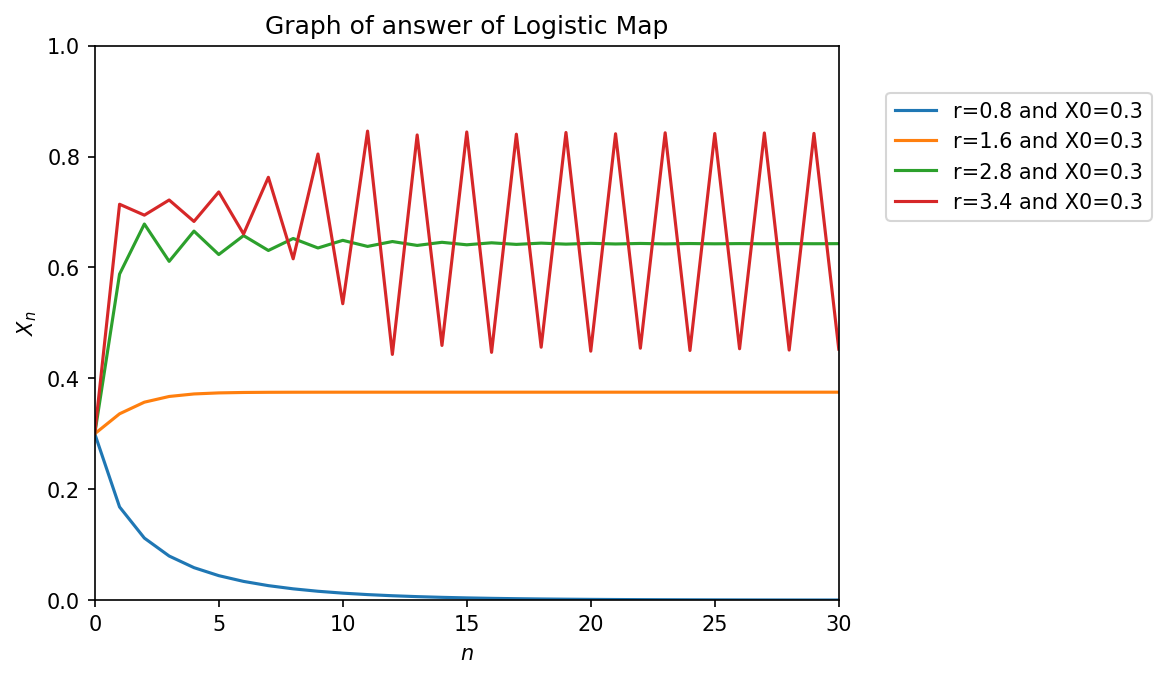

In [162]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=150
plt.rcParams['savefig.dpi']=100

x0=0.3
#r=0.25
N=30

def f(x,r):
    return r*x*(1-x)
def sol(N,x0,r):
    X=np.array([x0])
    I=np.array([0])
    for i in range(N):
        x=f(X[i],r)
        X=np.append(X,x)
        I=np.append(I,i+1)
    plt.plot(I,X,label=f'r={r} and X0={x0}')

sol(N,x0,0.8)
sol(N,x0,1.6)
sol(N,x0,2.8)
sol(N,x0,3.4)

plt.xlim(0,30)
plt.ylim(0,1)
plt.xlabel(r'$n$')
plt.ylabel(r'$X_n$')
plt.title('Graph of answer of Logistic Map')
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="center left")
plt.show()

Graphing Logistic Map with very close initial $X_0$ in Chaotic Region

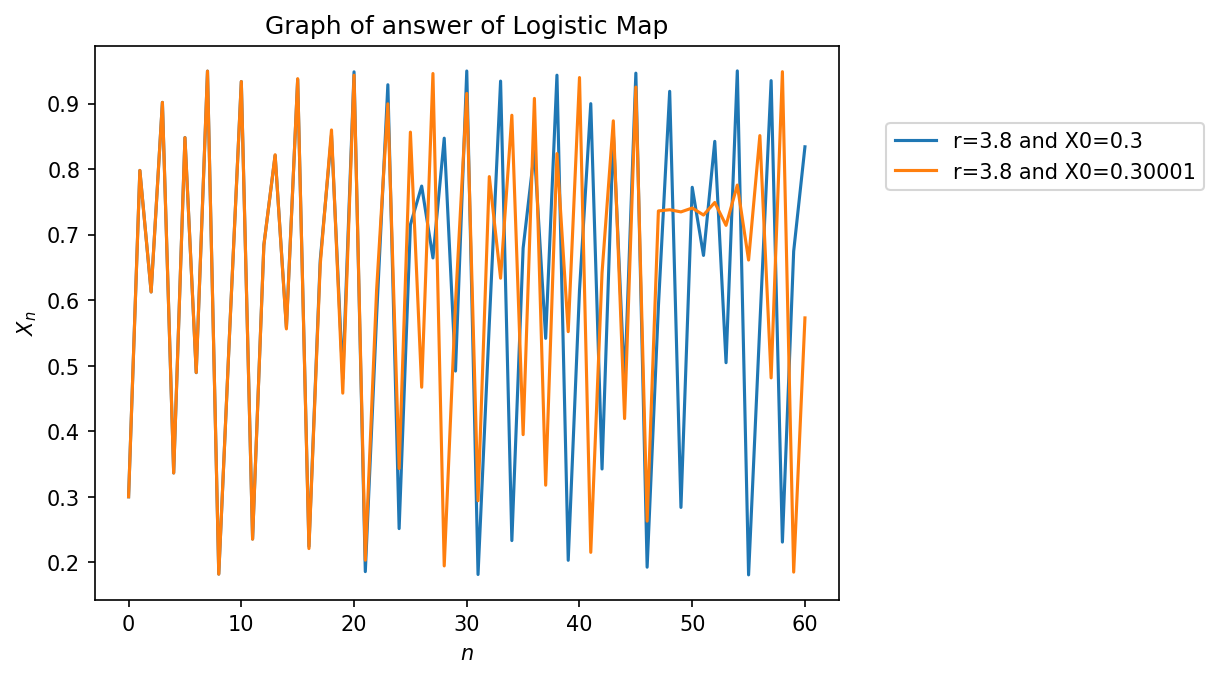

In [163]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=150
plt.rcParams['savefig.dpi']=100

x0=0.3
delta=0.00001
r=3.8
N=60

def f(x,r):
    return r*x*(1-x)

X=np.array([x0])
Y=np.array([x0+delta])
I=np.array([0])
for i in range(N):
    x=f(X[i],r)
    y=f(Y[i],r)
    X=np.append(X,x)
    Y=np.append(Y,y)
    I=np.append(I,i+1)

plt.plot(I,X,label=f'r={r} and X0={x0}')
plt.plot(I,Y,label=f'r={r} and X0={x0+delta}')
#plt.xlim(0,100)
#plt.ylim(0,1)
plt.xlabel(r'$n$')
plt.ylabel(r'$X_n$')
plt.title('Graph of answer of Logistic Map')
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="center left")
plt.show()

Bifurcation diagram of Logistic Map 

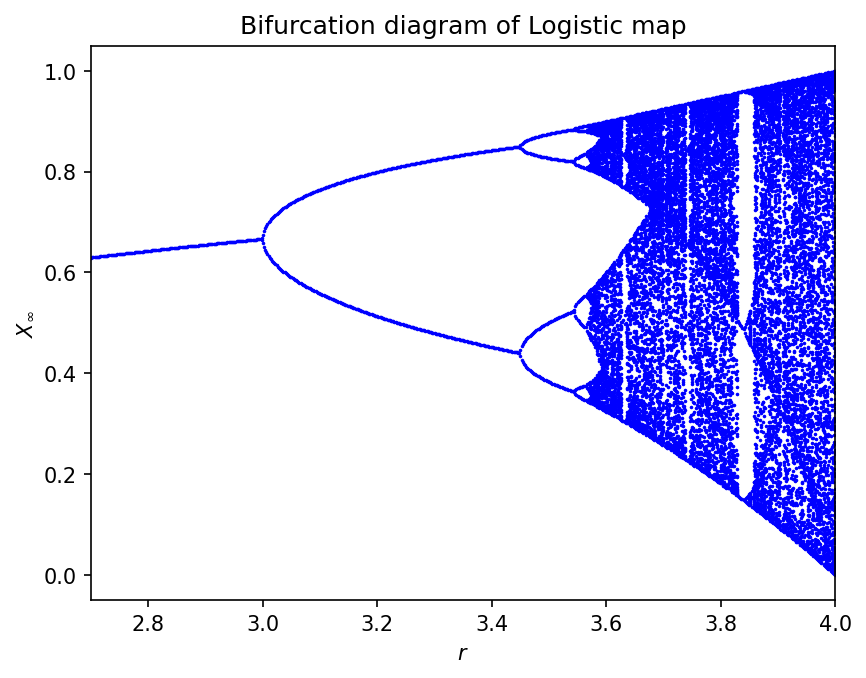

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=150
plt.rcParams['savefig.dpi']=100

x0=0.3
r=0.0
#r=r/4
N=1000
Nt=900
r_max=4

def f(x,r):
    return r*x*(1-x)
def sol(N,x0,r):
    X=np.array([x0])
    I=np.array([0])
    for i in range(N):
        x=f(X[i],r)
        X=np.append(X,x)
        I=np.append(I,i+1)
    error=0.001
    distinct=np.array([])
    Y=X[Nt:]
    for j in Y:
        if not any(np.isclose(j, distinct, atol=error)):
            distinct=np.append(distinct,j)
    for k in range(len(distinct)):
        plt.scatter(r,distinct[k],color='b',s=0.5)

while True:
    sol(N,x0,r)
    r=r+0.002
    if r>=r_max:
        break

plt.xlim(2.7,4)
plt.ylim(-0.05,1.05)
plt.xlabel(r'$r$')
plt.ylabel(r'$X_\infty$')
plt.title('Bifurcation diagram of Logistic map')
#plt.legend(bbox_to_anchor=(1.05, 0.8), loc="center left")
plt.show()

Finding Feigenbaum Constant $\delta = \lim_{n\to\infty}\left(\frac{r_n-r_{n-1}}{r_{n+1}-r_n}\right)$

In [151]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=150
plt.rcParams['savefig.dpi']=100

x0=0.3
r=0.0
#r=r/4
N=1000
Nt=900
r_max=4

def f(x,r):
    return r*x*(1-x)
def sol(N,x0,r):
    X=np.array([x0])
    I=np.array([0])
    for i in range(N):
        x=f(X[i],r)
        X=np.append(X,x)
        I=np.append(I,i+1)
    error=0.001
    distinct=np.array([])
    Y=X[Nt:]
    for j in Y:
        if not any(np.isclose(j, distinct, atol=error)):
            distinct=np.append(distinct,j)
    return distinct
cut_r=np.array([])
Cuts=np.array([2,4,8,16])
for cut in Cuts:
    while True:
        distinct=sol(N,x0,r)
        if len(distinct)==cut:
            cut_r=np.append(cut_r,r)
            break
        r=r+0.001
        if r>=r_max:
            break
delta=0
print('Bifacturation r s: ',cut_r)
for p in range(1,3):
    delta+=(cut_r[p]-cut_r[p-1])/(cut_r[p+1]-cut_r[p])
print('Feigenbaum Constant = ',delta/2)

Bifacturation r s:  [2.997 3.449 3.545 3.566]
Feigenbaum Constant =  4.6398809523809526


Finding Feigenbaum Constant $\alpha = \lim_{n\to\infty}\left(\frac{d_n}{d_{n+1}}\right)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=150
plt.rcParams['savefig.dpi']=100

x0=0.3
r=0.0
#r=r/4
N=1000
Nt=900
r_max=3.6

def f(x,r):
    return r*x*(1-x)
def sol(N,x0,r,):
    X=np.array([x0])
    I=np.array([0])
    for i in range(N):
        x=f(X[i],r)
        X=np.append(X,x)
        I=np.append(I,i+1)
    error=0.001
    distinct=[]
    Y=X[Nt:]
    for j in Y:
        if not any(np.isclose(j, distinct, atol=error)):
            distinct.append(j)
    return distinct
Dis=[]
while True:
    dis=sol(N,x0,r)
    Dis.append(dis)
    if len(dis)==4:
        diss=Dis[-2]
        d1=diss[0]-diss[1]
        #print(diss)
        break
    r=r+0.002
    if r>=r_max:
        break
while True:
    dis=sol(N,x0,r)
    Dis.append(dis)
    if len(dis)==8:
        diss=Dis[-2]
        d2=diss[2]-diss[0]
        #print(diss)
        break
    r=r+0.002
    if r>=r_max:
        break
#print(Dis)
print('Feigenbaum Constant α = ',d1/d2)

Feigenbaum Constant α =  -2.5224769328366423


We can do and graph all previous codes with the specific Logistic Map told in class:
$X_{n+1}=4rX_n(1-X_n)$


 Graph of answer of Logistic Map: 


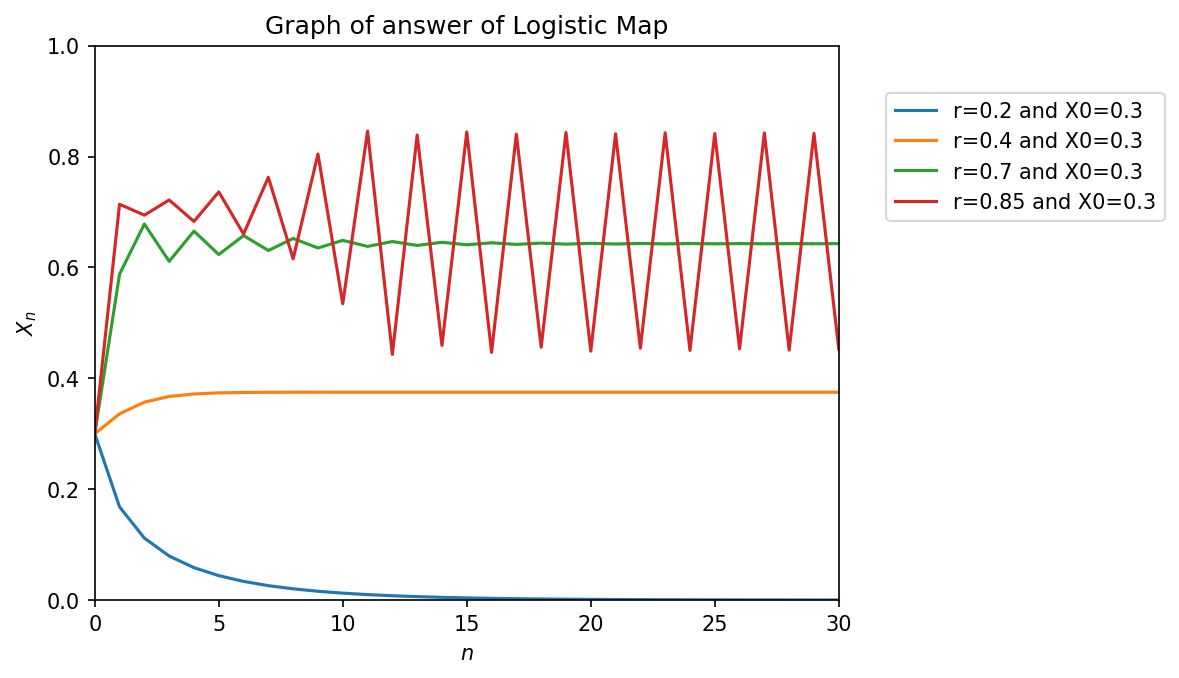


 Graph of answer of Logistic Map with two close initial conditions: 


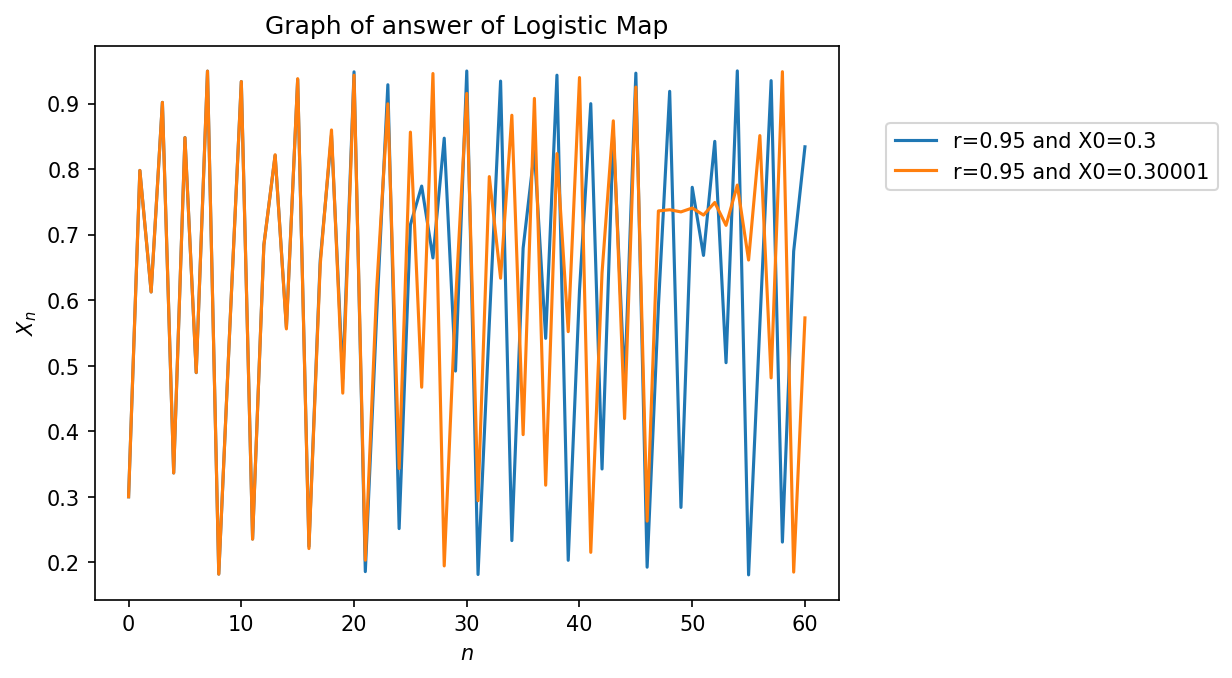


 Graph of answer of Logistic Map Bifurcation diagrams: 


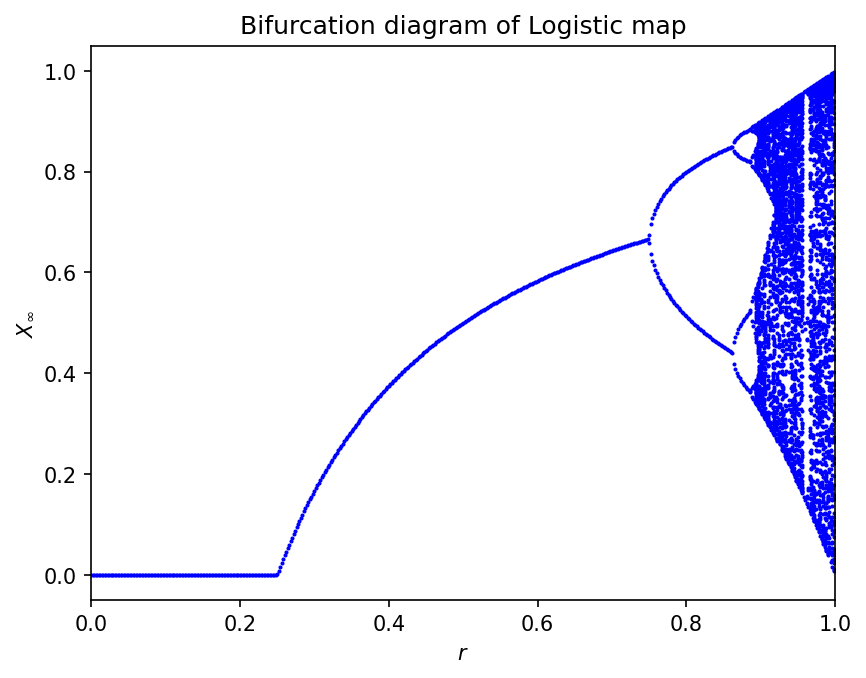

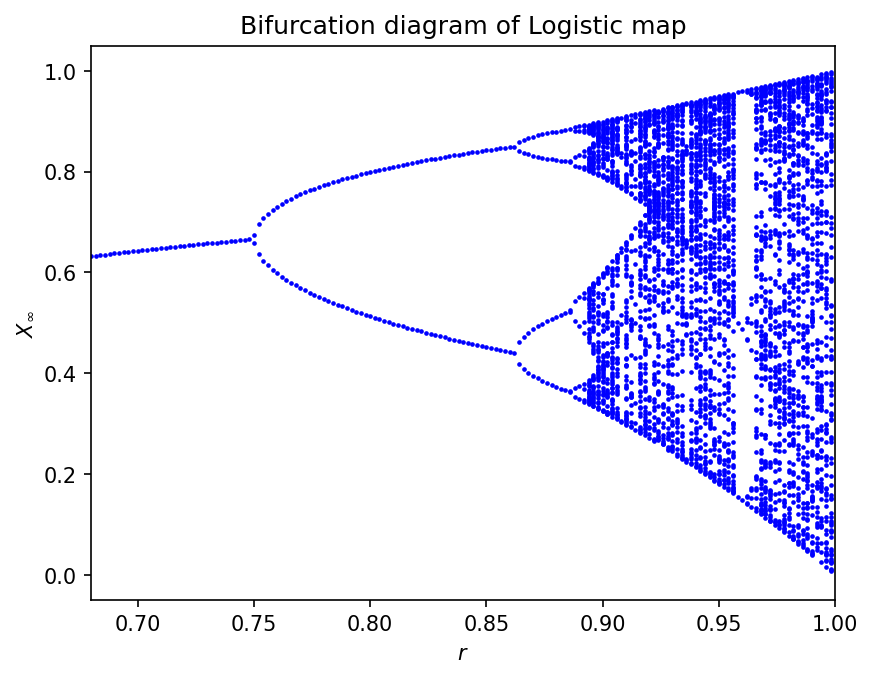

In [168]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=150
plt.rcParams['savefig.dpi']=100
print('\n','Graph of answer of Logistic Map: ')
x0=0.3
#r=0.25
N=30

def f(x,r):
    return 4*r*x*(1-x)
def sol1(N,x0,r):
    X=np.array([x0])
    I=np.array([0])
    for i in range(N):
        x=f(X[i],r)
        X=np.append(X,x)
        I=np.append(I,i+1)
    plt.plot(I,X,label=f'r={r} and X0={x0}')

sol1(N,x0,0.2)
sol1(N,x0,0.4)
sol1(N,x0,0.7)
sol1(N,x0,0.85)

plt.xlim(0,30)
plt.ylim(0,1)
plt.xlabel(r'$n$')
plt.ylabel(r'$X_n$')
plt.title('Graph of answer of Logistic Map')
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="center left")
plt.show()

print('\n','Graph of answer of Logistic Map with two close initial conditions: ')
delta=0.00001
r=0.95
N=60

X=np.array([x0])
Y=np.array([x0+delta])
I=np.array([0])
for i in range(N):
    x=f(X[i],r)
    y=f(Y[i],r)
    X=np.append(X,x)
    Y=np.append(Y,y)
    I=np.append(I,i+1)

plt.plot(I,X,label=f'r={r} and X0={x0}')
plt.plot(I,Y,label=f'r={r} and X0={x0+delta}')
#plt.xlim(0,100)
#plt.ylim(0,1)
plt.xlabel(r'$n$')
plt.ylabel(r'$X_n$')
plt.title('Graph of answer of Logistic Map')
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="center left")
plt.show()
print('\n','Graph of answer of Logistic Map Bifurcation diagrams: ')
r=0.0
N=1000
Nt=900
r_max=1

def sol2(N,x0,r):
    X=np.array([x0])
    I=np.array([0])
    for i in range(N):
        x=f(X[i],r)
        X=np.append(X,x)
        I=np.append(I,i+1)
    error=0.001
    distinct=np.array([])
    Y=X[Nt:]
    for j in Y:
        if not any(np.isclose(j, distinct, atol=error)):
            distinct=np.append(distinct,j)
    for k in range(len(distinct)):
        plt.scatter(r,distinct[k],color='b',s=0.9)

while True:
    sol2(N,x0,r)
    r=r+0.002
    if r>=r_max:
        break

plt.xlim(0.0,1)
plt.ylim(-0.05,1.05)
plt.xlabel(r'$r$')
plt.ylabel(r'$X_\infty$')
plt.title('Bifurcation diagram of Logistic map')
#plt.legend(bbox_to_anchor=(1.05, 0.8), loc="center left")
plt.show()

r=0.0
def sol3(N,x0,r):
    X=np.array([x0])
    I=np.array([0])
    for i in range(N):
        x=f(X[i],r)
        X=np.append(X,x)
        I=np.append(I,i+1)
    error=0.001
    distinct=np.array([])
    Y=X[Nt:]
    for j in Y:
        if not any(np.isclose(j, distinct, atol=error)):
            distinct=np.append(distinct,j)
    for k in range(len(distinct)):
        plt.scatter(r,distinct[k],color='b',s=1.5)

while True:
    sol3(N,x0,r)
    r=r+0.002
    if r>=r_max:
        break

plt.xlim(0.68,1)
plt.ylim(-0.05,1.05)
plt.xlabel(r'$r$')
plt.ylabel(r'$X_\infty$')
plt.title('Bifurcation diagram of Logistic map')
#plt.legend(bbox_to_anchor=(1.05, 0.8), loc="center left")
plt.show()